In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('husl')

## Get results and tidy dataset

In [112]:
df = pd.read_csv('data/results.csv', usecols=['title', 'year', 'decision', 'approach', 'category', 'model', 'preprocessing', 'skill', 'evaluation'])
df = df[df.decision.str.contains('Include')]
df.head()

,year,title,decision,approach,category,model,preprocessing,skill,evaluation
0,2014,A system to grade computer programming skills ...,Include,Supervised,Traditional,Ridge Regression and others,Count Tokens; Count Expressions; Build good se...,Correctness,Cross Validation; Pearson Correlation Coeffici...
4,2019,Annete: An intelligent tutoring companion embe...,Include,Supervised,Neural,MLP,Normalize tokens,Correctness and Maintainability,Case Study
7,2019,Automatic classification of error types in sol...,Include,Unsupervised,Traditional,Heirarchal Agg Clustering,"Convert to Source to Graph (AST, CFG or DDG)",Correctness,Precision-Recall Curve; Compared to Validation...
8,2017,Automatic extraction of AST patterns for debug...,Include,Supervised,Traditional,"Random Forest, Majority Classifer","Convert to Source to Graph (AST, CFG or DDG); ...",Correctness,Accuracy; Compared to models within paper
9,2018,Compilation error repair: For the student prog...,Include,Supervised,Neural,Encoder/Decoder with attention,Normalize tokens; String literals removed,Syntactic Correctness,Perc@k; SPerc@k; Compared to different dataset...


In [113]:
df.dtypes

year              int64
title            object
decision         object
approach         object
category         object
model            object
preprocessing    object
skill            object
evaluation       object
dtype: object

## Results
### Years Published

In [114]:
count_years = df.year.value_counts().reset_index().rename(columns={'index': 'year', 'year': 'no_published'})
count_years.head()

,year,no_published
0,2019,7
1,2018,3
2,2014,2
3,2017,2
4,2021,2


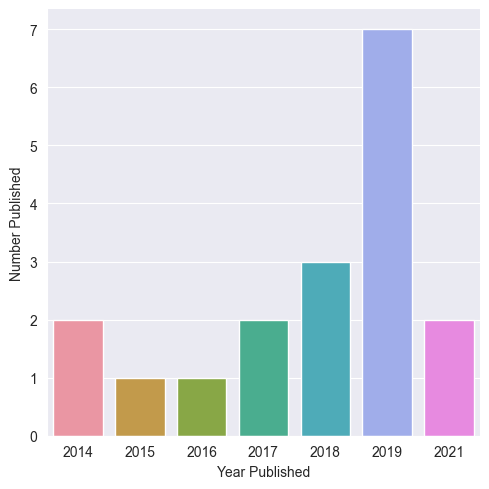

In [115]:
years_plt = sns.catplot(count_years, kind='bar', x='year', y='no_published')
years_plt.set(xlabel='Year Published', ylabel='Number Published')
plt.savefig('plots/years_published.pdf')

## Skills

In [116]:
skill = df.skill.value_counts().reset_index()
skill.columns = ["skill", 'no_papers']
skill.skill = skill.skill.str.title()
skill['proportion'] = (skill.no_papers / skill.no_papers.sum()) * 100
skill

,skill,no_papers,proportion
0,Correctness,10,55.555556
1,Syntactic Correctness,6,33.333333
2,Correctness And Maintainability,1,5.555556
3,Correctness And Readability,1,5.555556


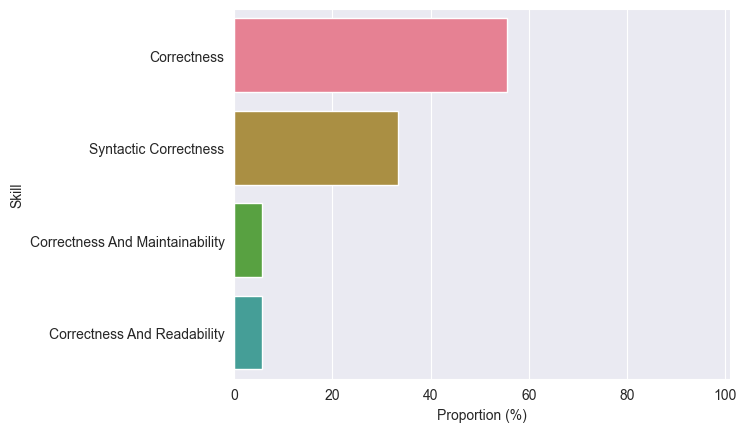

In [117]:
ax_skill = sns.barplot(skill, y='skill', x='proportion')
ax_skill.set(xlabel = 'Proportion (%)', ylabel='Skill')
plt.xlim([0, 101])
plt.savefig('plots/skill.pdf', bbox_inches='tight')

## Paradigm

In [118]:
paradigm = df.approach.value_counts().reset_index()
paradigm.columns = ["paradigm", 'no_papers']
paradigm['proportion'] = (paradigm.no_papers / paradigm.no_papers.sum()) * 100
paradigm

,paradigm,no_papers,proportion
0,Supervised,14,77.777778
1,Unsupervised,3,16.666667
2,Semi-Supervised,1,5.555556


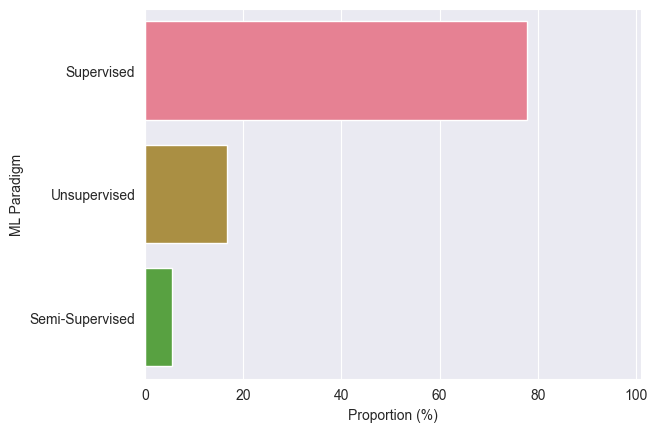

In [119]:
ax_paradigm = sns.barplot(paradigm, y='paradigm', x='proportion')
ax_paradigm.set(xlabel = 'Proportion (%)', ylabel='ML Paradigm')
plt.xlim([0, 101])
plt.savefig('plots/paradigm.pdf', bbox_inches='tight')

## Category

In [120]:
category = df.category.value_counts().reset_index()
category.columns = ["category", 'no_papers']
category['proportion'] = (category.no_papers / category.no_papers.sum()) * 100
category.category = category.category.str.replace('Neural', 'Deep Learning')
category.category = category.category.str.replace('Agent-Based', 'Reinforcement Learning')
category

,category,no_papers,proportion
0,Deep Learning,10,55.555556
1,Traditional,6,33.333333
2,Deep Learning and Reinforcement Learning,1,5.555556
3,Both,1,5.555556


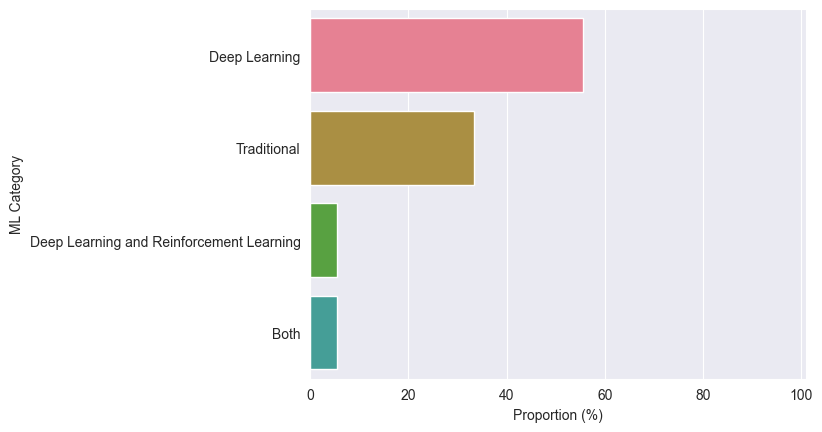

In [121]:
ax_category = sns.barplot(category, y='category', x='proportion')
ax_category.set(xlabel = 'Proportion (%)', ylabel='ML Category')
plt.xlim([0, 101])
plt.savefig('plots/category.pdf', bbox_inches='tight')

## Model
Covered by above two plots and will have specific detail in the discussion section.

## Preprocessing

In [132]:
pre_proc_df = df.copy()
pre_proc_df = pre_proc_df.preprocessing.str.split('; ').explode()
pre_proc_df = pre_proc_df.value_counts().reset_index()
pre_proc_df.columns = ["preprocessing", 'no_papers']
pre_proc_df['proportion'] = (pre_proc_df.no_papers / pre_proc_df.no_papers.sum()) * 100
pre_proc_df.preprocessing = pre_proc_df.preprocessing.apply(lambda x: x.title() if x[0].islower() else x)
pre_proc_df

,preprocessing,no_papers,proportion
0,Normalize tokens,11,36.666667
1,"Convert to Source to Graph (AST, CFG or DDG)",7,23.333333
2,Build good set using unit tests,3,10.000000
3,Remove comments,2,6.666667
4,Count Tokens,1,3.333333
5,Count Expressions,1,3.333333
6,String literals removed,1,3.333333
7,Encode Line Numbers,1,3.333333
8,Convert to Grammar,1,3.333333
9,Convert blocks to string,1,3.333333


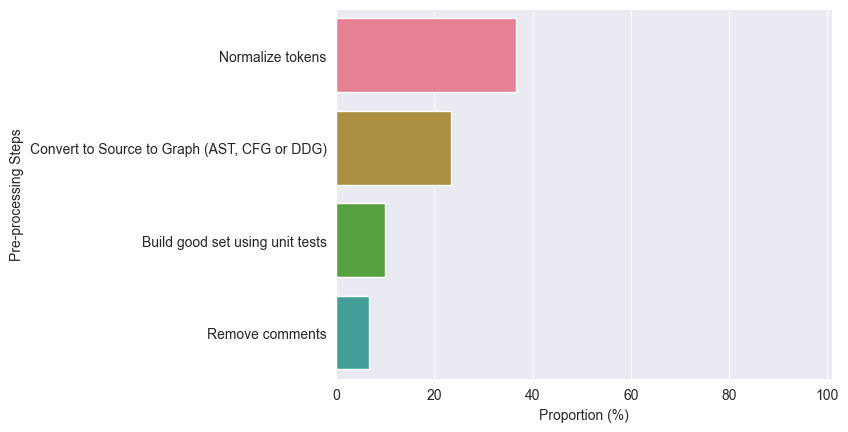

In [123]:
ax_pre_proc = sns.barplot(pre_proc_df[pre_proc_df.no_papers > 1], y='preprocessing', x='proportion')
ax_pre_proc.set(xlabel = 'Proportion (%)', ylabel='Pre-processing Steps')
plt.xlim([0, 101])
plt.savefig('plots/preprocessing.pdf', bbox_inches='tight')

## Evaluation

In [129]:
# TODO: Tidy annotations and reannotate

eval_df = df.copy()
eval_df = eval_df.evaluation.str.split('; ').explode()
eval_df = eval_df.value_counts().reset_index()
eval_df.columns = ["evaluation", 'no_papers']
eval_df['proportion'] = (eval_df.no_papers / eval_df.no_papers.sum()) * 100
eval_df.evaluation = eval_df.evaluation.apply(lambda x: x.title())

eval_df

,evaluation,no_papers,proportion
0,Accuracy,11,21.568627
1,Compared To Baselines,6,11.764706
2,Cross Validation,4,7.843137
3,Compared To Models Within Paper,4,7.843137
4,Compared To Human,3,5.882353
5,Case Study,3,5.882353
6,Precision,2,3.921569
7,Mean Absolute Error,2,3.921569
8,Pearson Correlation Coefficient,2,3.921569
9,Recall,2,3.921569


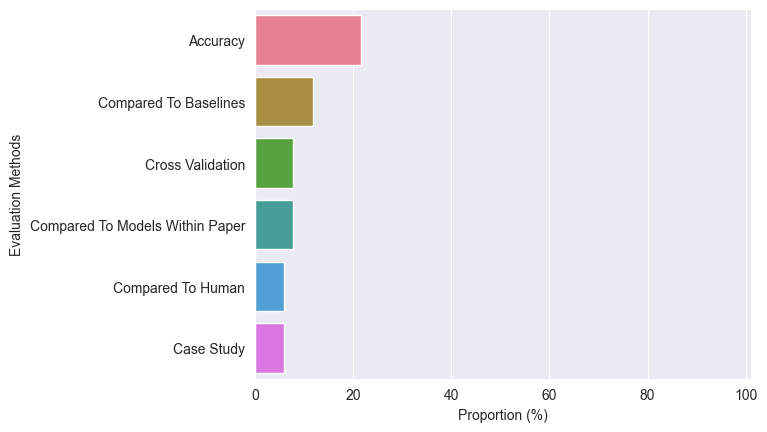

In [133]:
# May need to truncate
ax_eval = sns.barplot(eval_df[eval_df.no_papers > 2], y='evaluation', x='proportion')
ax_eval.set(xlabel = 'Proportion (%)', ylabel='Evaluation Methods')
plt.xlim([0, 101])
plt.savefig('plots/evaluation.pdf', bbox_inches='tight')